In [1]:
%load_ext autoreload
%autoreload 2

from tqdm import tqdm
import pandas as pd
import numpy as np
import gzip
import json
import math
from datetime import datetime
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
import sys
sys.path.append('..')
from helper.manage_orderbooks import extract_orderbooks_for_one_currencypair, load_orderbook_snapshot, plot_episode, OrderbookEpisodesGenerator
from helper.orderbook_container import OrderbookContainer
from helper.orderbook_trader import OrderbookTradingSimulator

In [3]:
filename = '/home/axel/data/small/obs_2016-11_USDT_BTC_maxVol100.dict'

data = load_orderbook_snapshot(filename, last_line=15)

T = 4
period_length = 60
episode_windows = OrderbookEpisodesGenerator(filename=filename, episode_length=T*period_length)
print("Length of episode_windows: {}".format(len(episode_windows)))

100%|██████████| 15/15 [00:01<00:00, 14.43it/s]


Loaded 15 orderbooks from file '/home/axel/data/small/obs_2016-11_USDT_BTC_maxVol100.dict'.
Length of episode_windows: 135


In [4]:
episode_windows[1][0]

../helper/manage_orderbooks.py:221: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  bids['Amount'] = bids.Amount.values.astype(float)


OrderbookContainer from 2016-11-08T14:01
  83 bids (best: 708.9)
  125 asks (best: 709.6332)
  kind: 'orderbook'

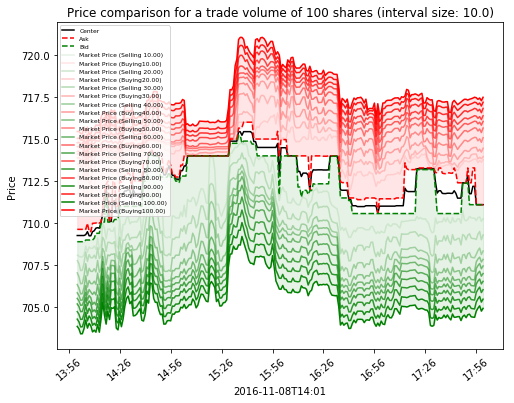

In [5]:
plot_episode(episode_windows[1], volume=100, intervals=10)

#### Test Orderbook plot, print and compare_with

,Amount,Type
703.500002,1.461657,bid
703.700000,0.001250,bid
705.000000,0.158232,bid
705.225474,NaN,center
705.450997,2.902181,ask
705.451000,0.270000,ask
706.171065,0.052838,ask


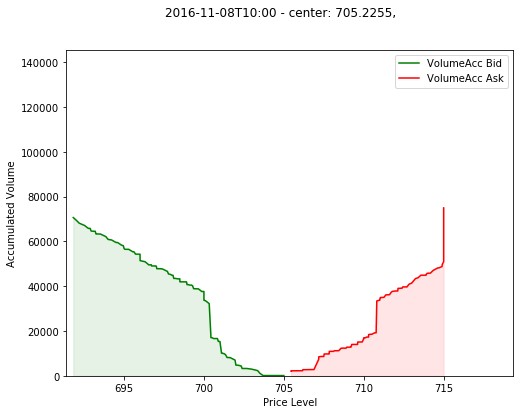

OrderbookContainer from 2016-11-08T10:00
  107 bids (best: 705.0)
  110 asks (best: 705.450997)
  kind: 'orderbook'
OrderbookContainer from 2016-11-08T10:01
  105 bids (best: 703.8007878)
  111 asks (best: 705.4509968)
  kind: 'orderbook'


In [6]:
orderbook = data[0]
orderbook2 = data[1]
orderbook3 = data[2]

display(orderbook.head(3))
orderbook.plot(range_factor=1.02)  # outfile='sample.pdf')
print(orderbook)
print(orderbook2)

In [7]:
orderbook = data[0]
orderbook2 = data[1]

display(orderbook.head())
display(orderbook2.head())

print("\nCompare two orderbooks:")
diff = orderbook2.compare_with(other=orderbook)

display(diff.head(10))
print(diff)

,Amount,Type
703.500002,1.461657,bid
703.700000,0.001250,bid
705.000000,0.158232,bid
705.225474,NaN,center
705.450997,2.902181,ask
705.451000,0.270000,ask
706.171065,0.052838,ask


,Amount,Type
703.357979,1.700000,bid
703.700000,0.001250,bid
703.800788,5.276769,bid
704.625570,NaN,center
705.450997,3.607053,ask
705.450997,1.172100,ask
705.451000,0.270000,ask



Compare two orderbooks:


,Amount,Type
701.150023,-0.193348,bid
701.133969,0.192838,bid
700.301359,0.272714,bid
698.228631,-0.273436,bid
697.842687,0.334005,bid
695.384016,0.385676,bid
694.842947,-0.334889,bid
694.010870,-0.386696,bid
692.000000,-1.984544,bid
691.822960,-1.610000,bid


OrderbookContainer from 2016-11-08T10:01
  17 bids (best: 691.8229603)
  7 asks (best: 705.4509968)
  kind: 'diff'


In [8]:
P = 15
vol=100
T = 4
episode_length = T*P
print("episode_length", episode_length)
episodes = int(len(data) / episode_length)

episode_windows = []
for e in range(0, episodes):
    episode_start = e*episode_length
    episode_end = (e+1)*episode_length
    window = [ob.copy() for ob in data[episode_start:episode_end]]
    print("episode_windows[{}] = orderbooks[{}:{}], length={}".format(e, episode_start, episode_end, len(window)))
    
    # window = [orderbooks[e*episode_length + idx].copy() for idx in range(episode_length)]
    episode_windows.append(window)
    
print("\nEpisodes: {}, orderbooks per episode: {}".format(len(episode_windows), len(episode_windows[0])))

ob = episode_windows[0][0]
ob2 = episode_windows[0][-1]
display(ob.head(3))
display(ob2.head(3))
plot_episode(episode_windows[0], volume=vol)

episode_length 60


IndexError: list index out of range

#### Test get_current_price()

In [ ]:
display(orderbook.head(3))
vol = 10

for factor in [0.25, 0.5, 0.75, 1.]:
    res = orderbook.get_current_price(vol*factor)
    print("MarketOrderPrice for {} shares: {:1.4f} (worst price: {})".format(vol*factor, res[0], res[1]))

#### Test orderbook.head and tail

In [ ]:
display(orderbook.head(2))
display(orderbook.tail(2))

#### Test parameter limit

In [ ]:
len(episode_windows[0])
from time import sleep, perf_counter as pc

In [ ]:
import time
def timefunc(f):
    def f_timer(*args, **kwargs):
        start = time.time()
        result = f(*args, **kwargs)
        end = time.time()
        print(f.__name__, 'took', end - start, 'time')
        return result
    return f_timer

In [ ]:
from functools import wraps
from time import time

def timing(f):
    @wraps(f)
    def wrap(*args, **kw):
        ts = time()
        result = f(*args, **kw)
        te = time()
        print('func:%r args:[%r, %r] took: %2.4f sec' % \
          (f.__name__, args, kw, te-ts))
        return result
    return wrap

@timing
def f(a):
    for _ in range(a):
        i = 0
    return -1

f(100)

In [ ]:
import cProfile
def test_trade():
    P = 15
    vol=100
    T = 4        
    
    datasub = data
    #plot_episode(datasub, volume=vol, intervals=10)
    
    ots = OrderbookTradingSimulator(orderbooks=datasub, volume=vol, tradingperiods=T, period_length=P)

    for i in range(4):
        print(i)
        summary = ots.trade(limit=707)
        display(summary)
        print("")
    
    display(ots.history)
    display(summary)
    
    print(summary['cashflow']/100.)
    
    return ots.history

test = test_trade()

In [ ]:
print(hist[['ASK', 'BID', 'CENTER', 'LIMIT', 'VOLUME', 'avg', 'cost', 'forced', 'high', 'volume_traded']].to_latex(float_format="%.3f"))

In [ ]:
P = 2
vol=100
T = 4
ots = OrderbookTradingSimulator(orderbooks=episode_windows[0][:T*P], volume=vol, tradingperiods=T,
                                period_length=P)

for e in tqdm(range(T)):
    summary = ots.trade(limit=706, verbose=True)

display(ots.history)
display(summary)


#### Test parameter aggression_factor

In [ ]:
P = 2
vol=100
T = 4
ots = OrderbookTradingSimulator(orderbooks=episode_windows[0][:T*P], volume=vol, tradingperiods=T,
                                period_length=P)

for e in tqdm(range(T)):
    action=0.9
    summary = ots.trade(agression_factor=action, verbose=True, extrainfo={'ACTION':action})
display(ots.history)